In [24]:
# import libraries & variables
import cv2
import os
import matplotlib.pyplot as plt

dataset_folder = "./dataset/dummy"
output_folder = './output/dummy'

In [25]:
'''
    관련 함수 정의
    1. load_images -> path에 있는 모든 jpg 불러오기
    2. convert_to_grayscale -> cv2.imread로 불러온 이미지를 모두 단일채널화
    3. detect_edges -> 에지검출 (threshold 수정 필요)
'''
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".JPG"):
            img = cv2.imread(os.path.join(folder_path, filename))
            if img is not None:
                images.append(img)
    return images

def convert_to_grayscale(images):
    gray_images = []
    for image in images:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray)
    return gray_images

def detect_edges(gray_images, lower_threshold=100, upper_threshold=200):
    edge_images = []
    for gray_image in gray_images:
        edges = cv2.Canny(gray_image, lower_threshold, upper_threshold)
        edge_images.append(edges)
    return edge_images

def invert_colors(images):
    inverted_images = []
    for image in images:
        inverted_image = cv2.bitwise_not(image)
        inverted_images.append(inverted_image)
    return inverted_images

def save_images(images, folder_path, prefix=""):
    for i, image in enumerate(images):
        cv2.imwrite(os.path.join(folder_path, f"{prefix}_image_{i}.JPG"), image)

Lower Threshold: 0, Upper Threshold: 50


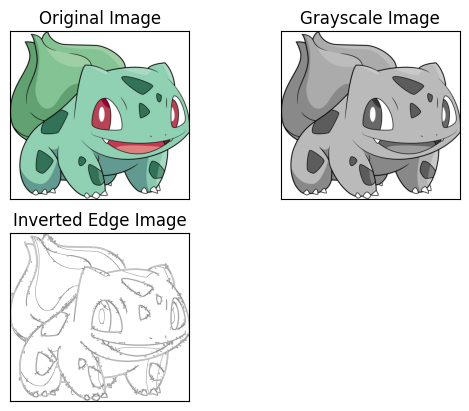

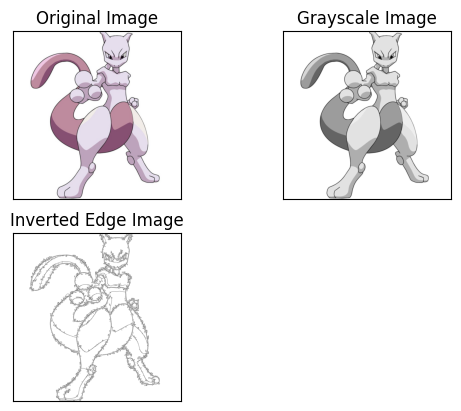

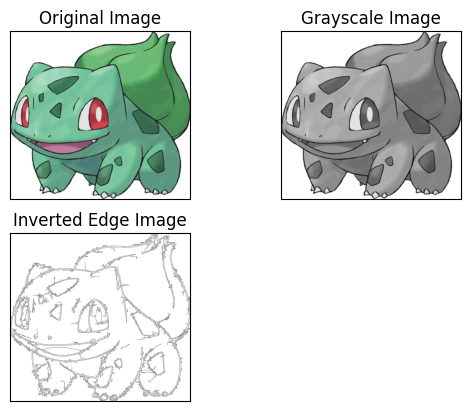

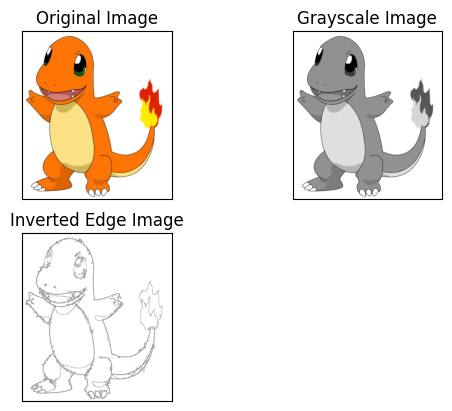

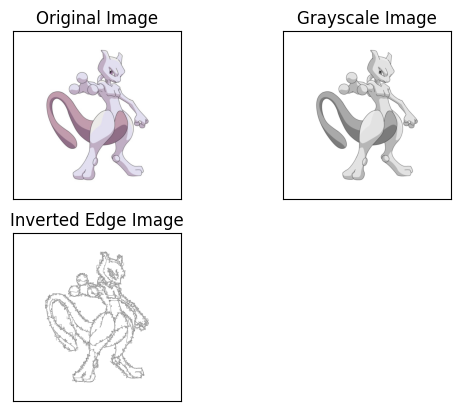

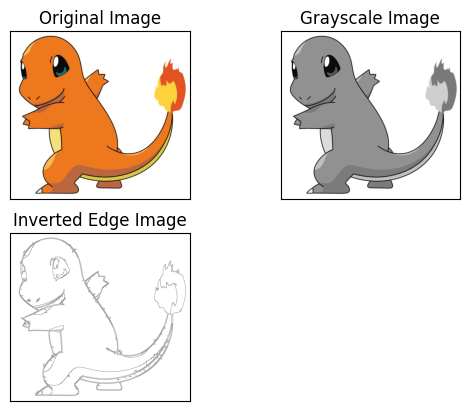

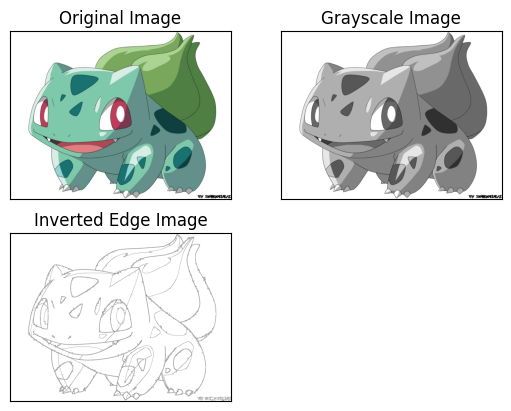

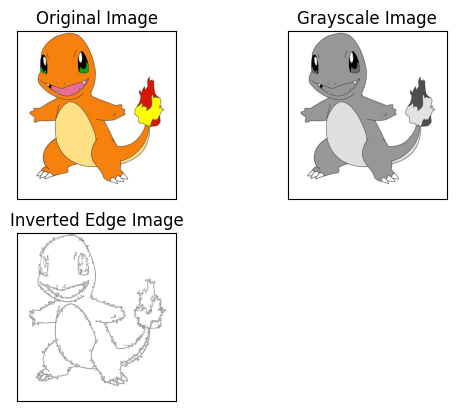

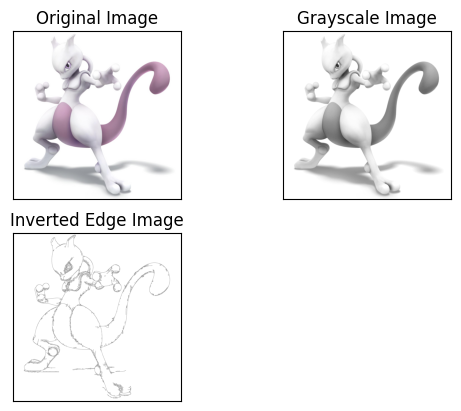

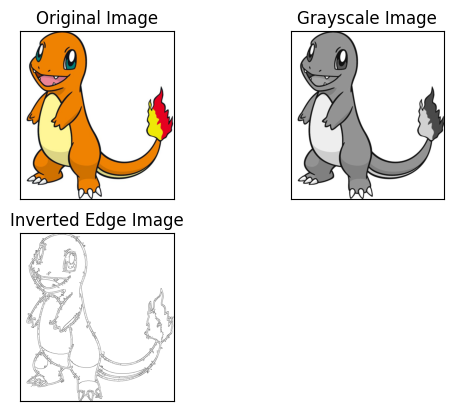

Lower Threshold: 20, Upper Threshold: 70


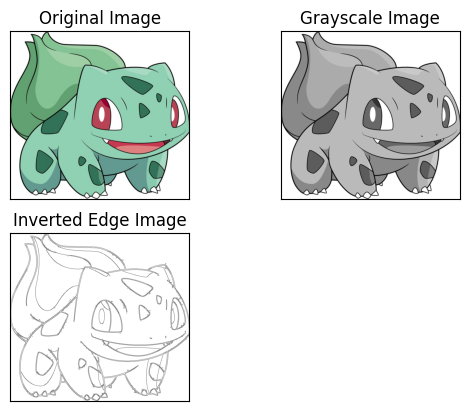

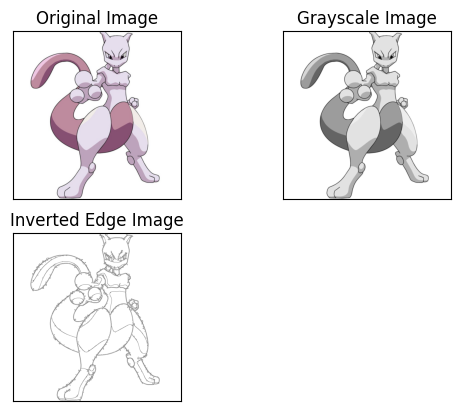

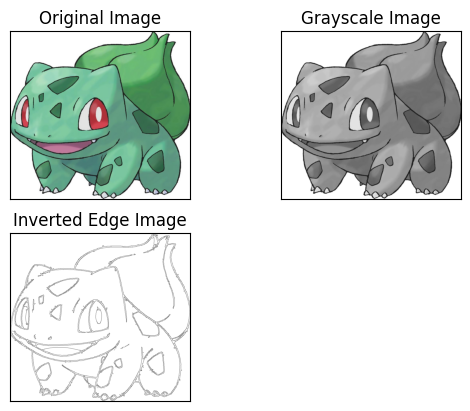

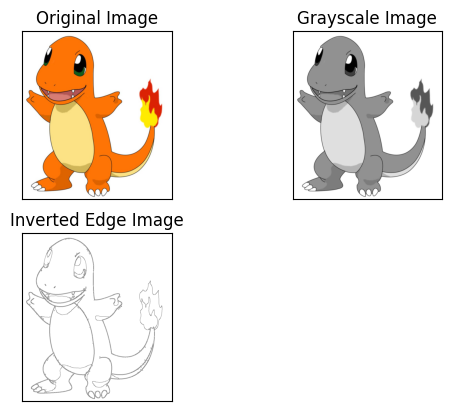

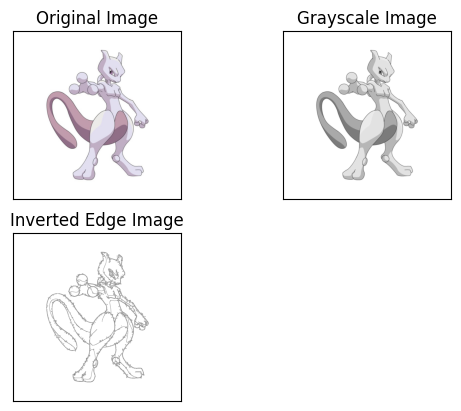

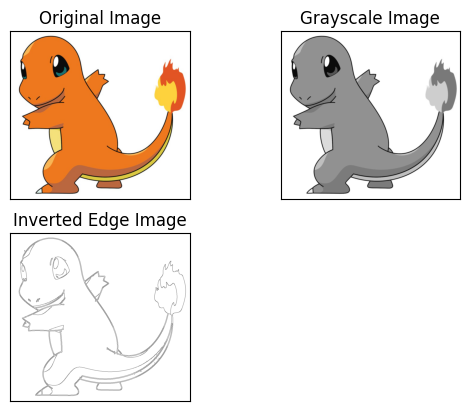

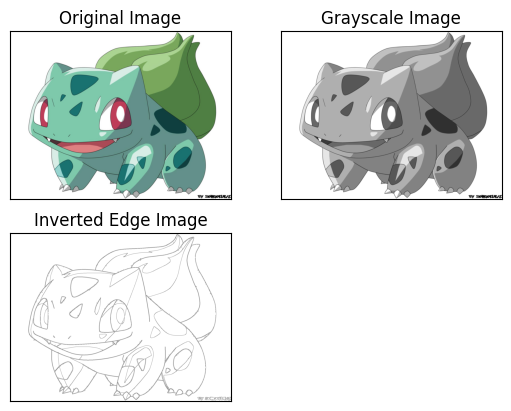

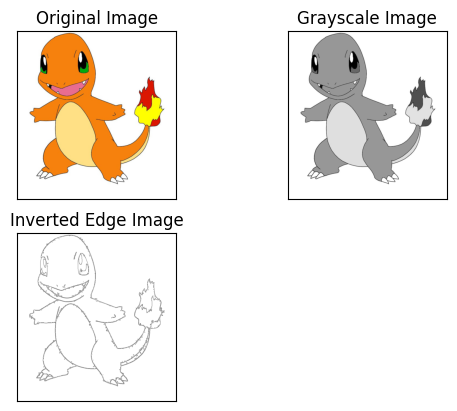

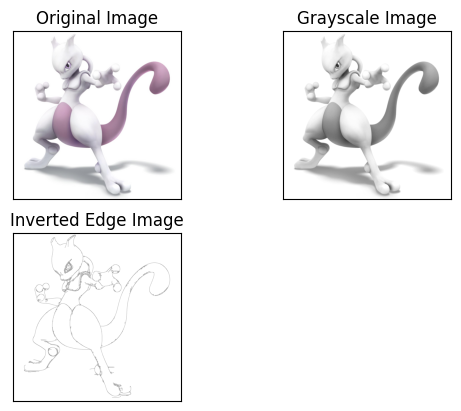

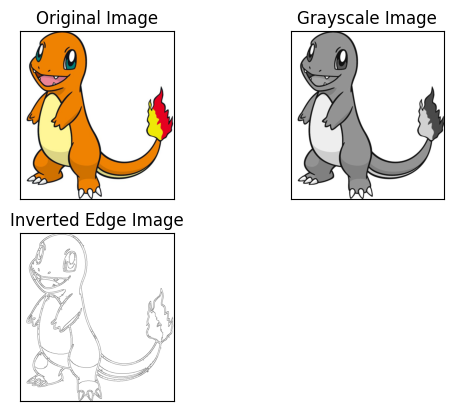

Lower Threshold: 40, Upper Threshold: 90


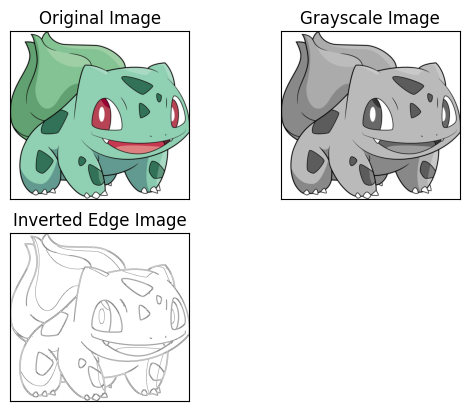

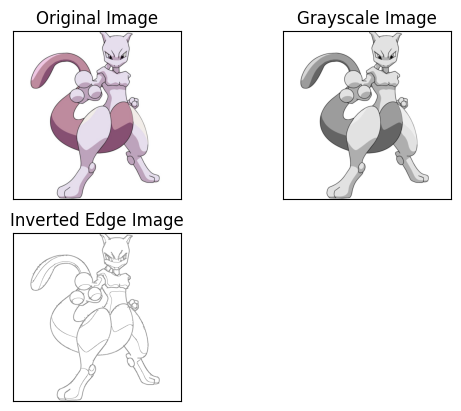

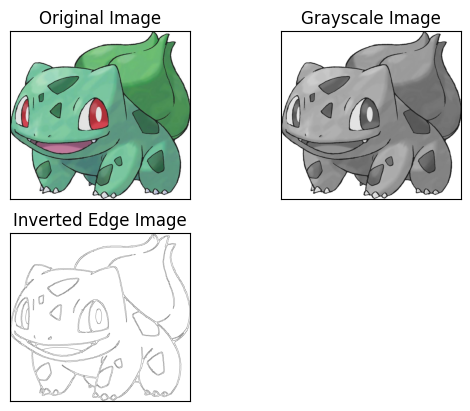

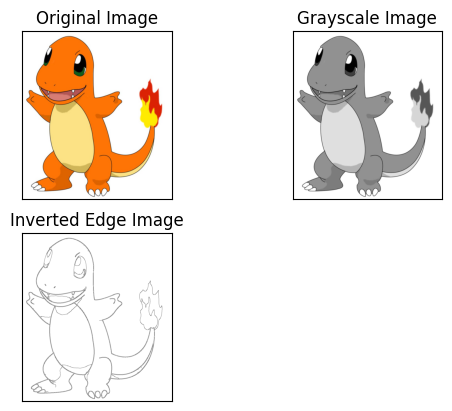

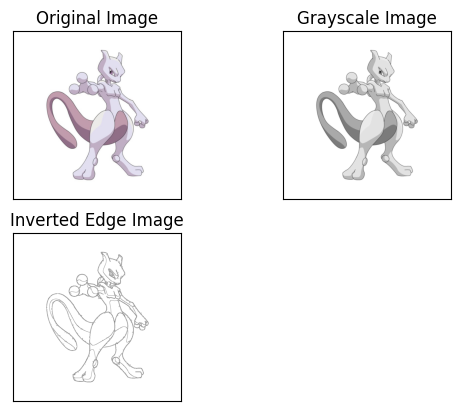

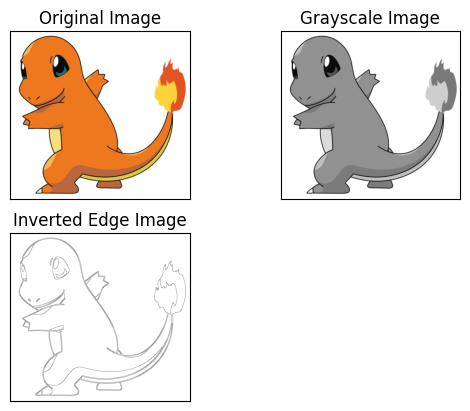

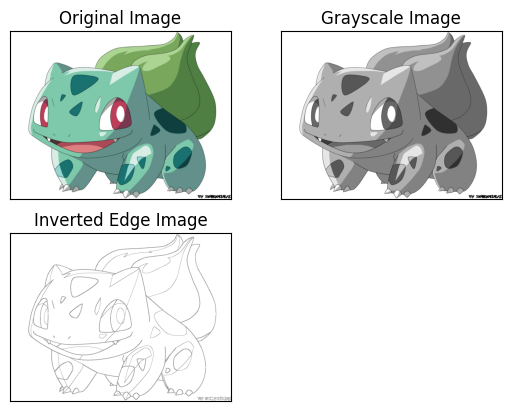

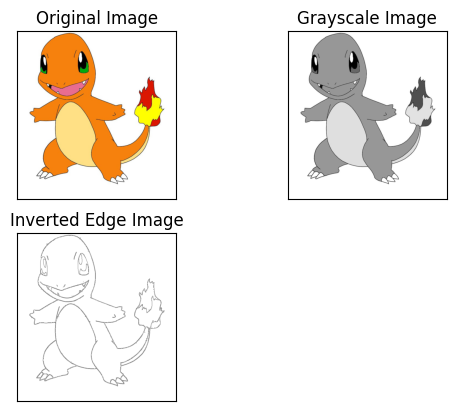

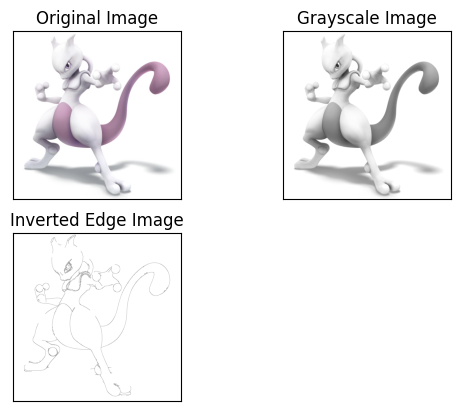

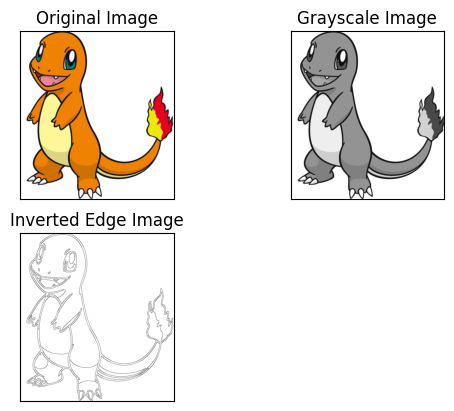

Lower Threshold: 60, Upper Threshold: 110


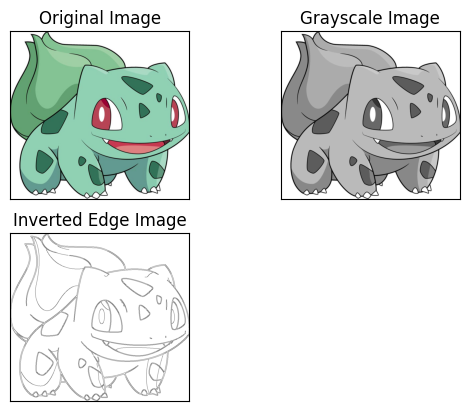

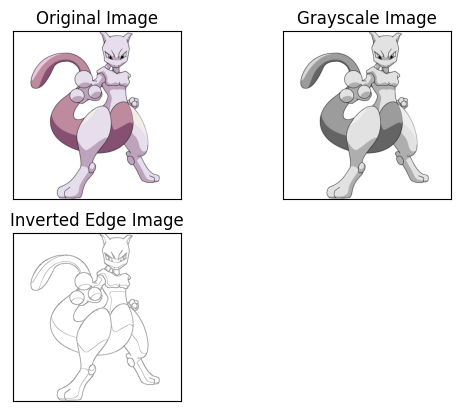

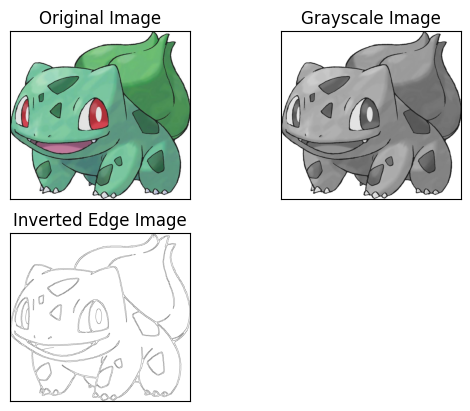

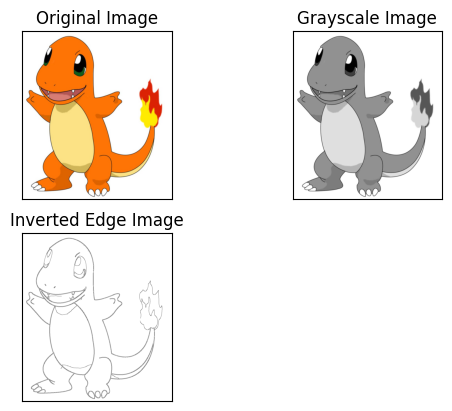

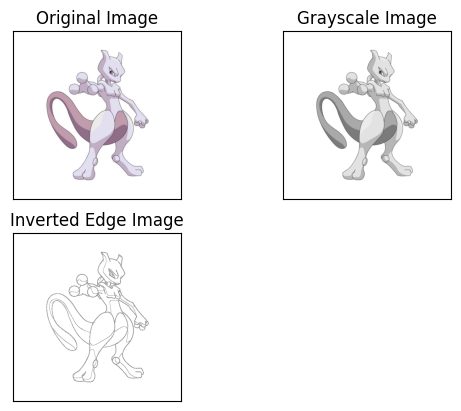

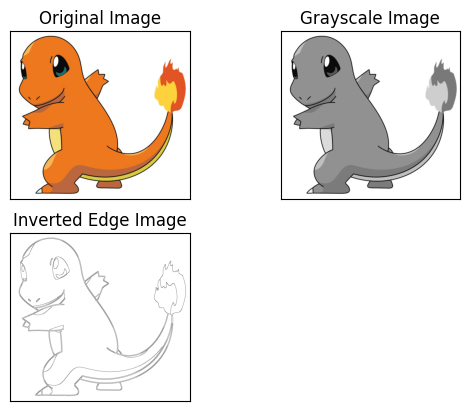

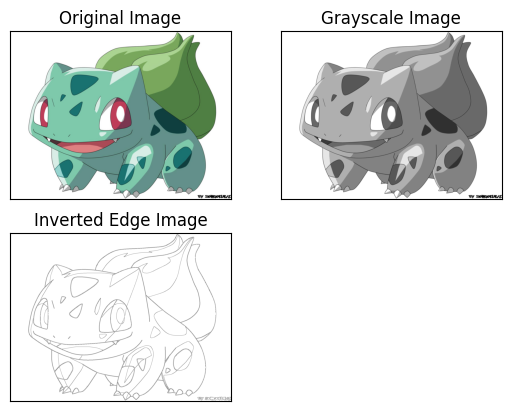

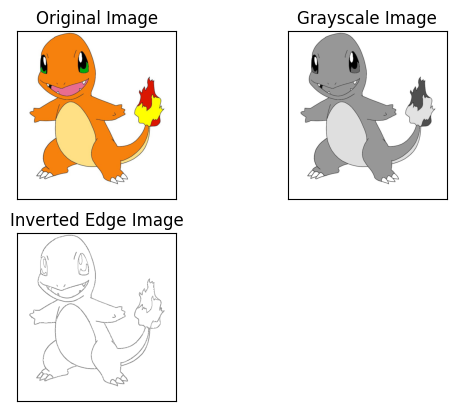

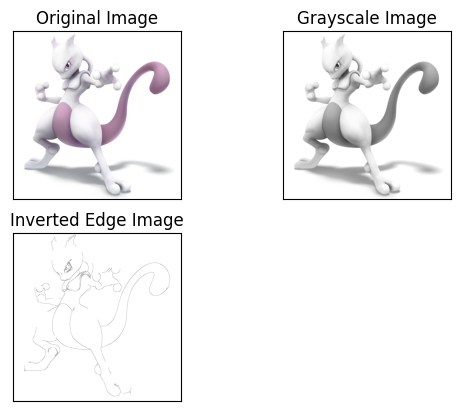

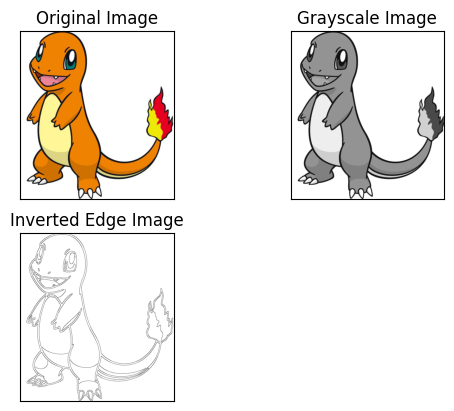

Lower Threshold: 80, Upper Threshold: 130


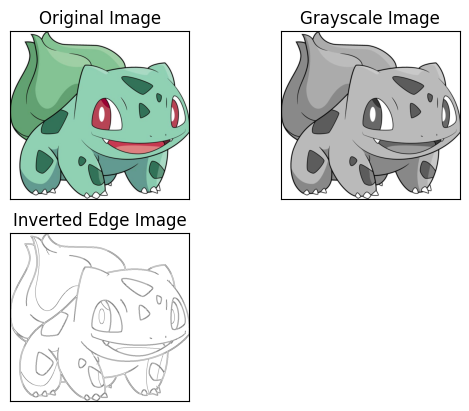

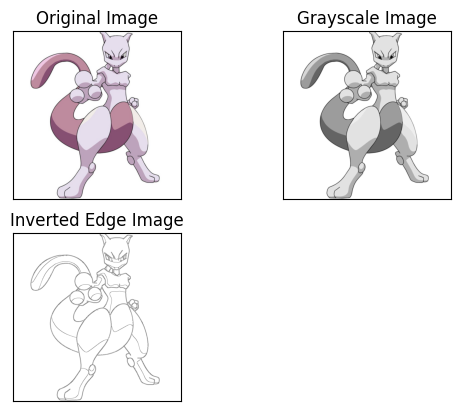

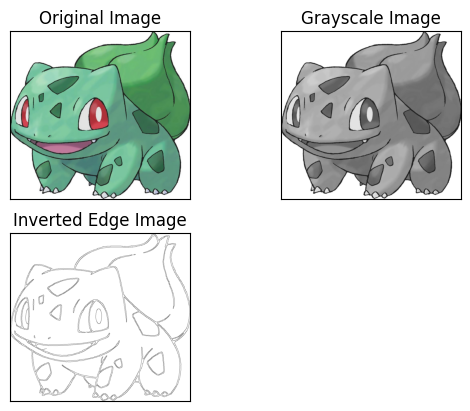

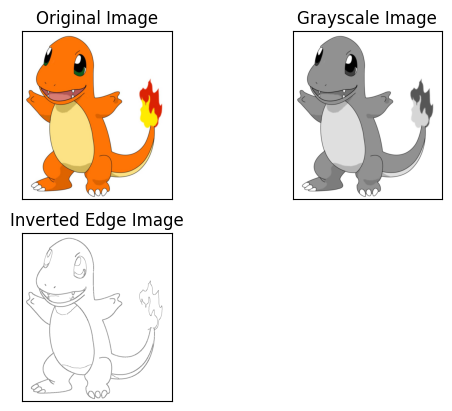

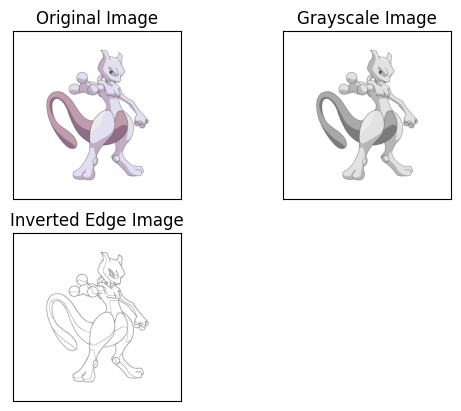

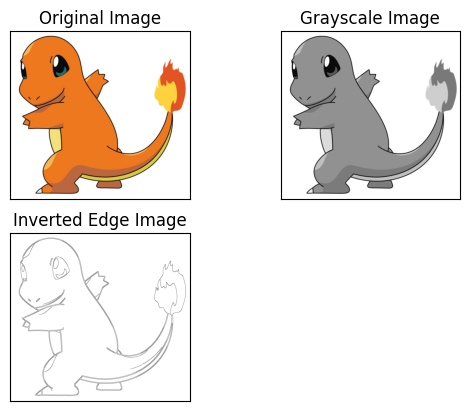

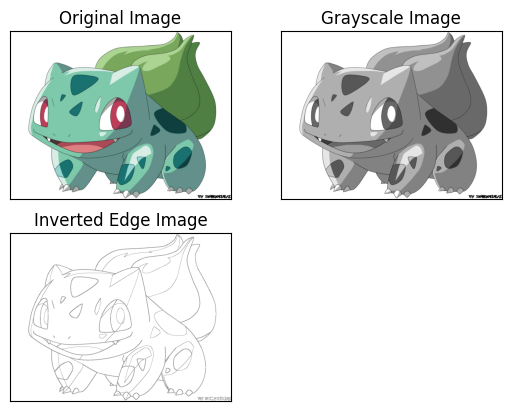

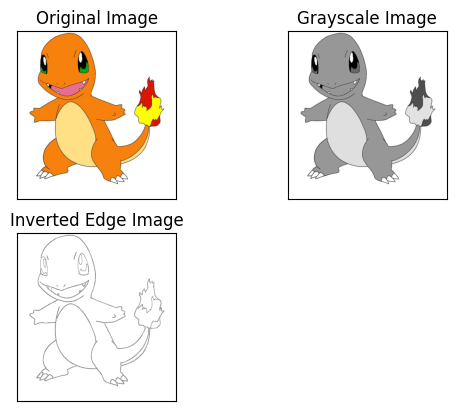

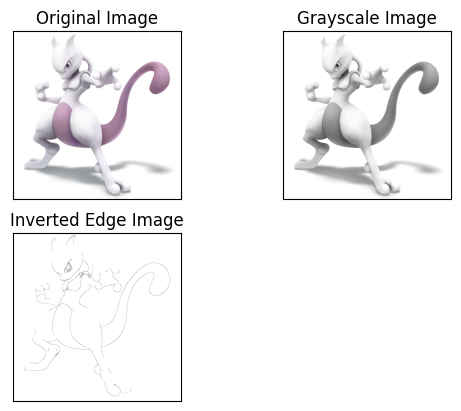

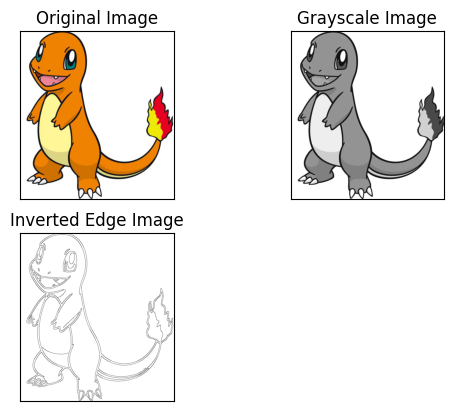

Lower Threshold: 100, Upper Threshold: 150


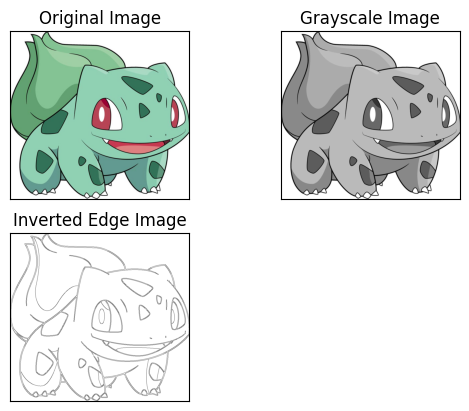

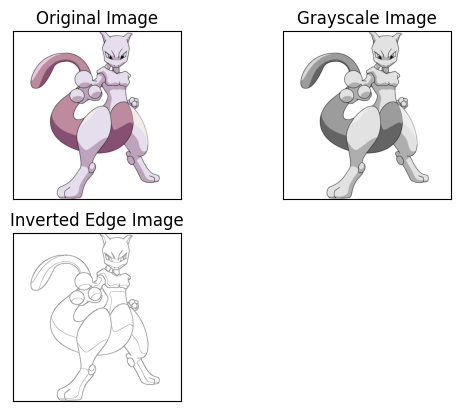

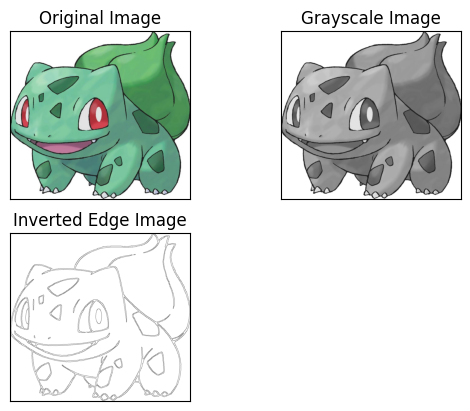

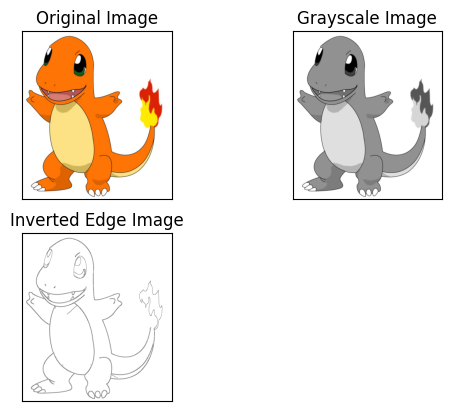

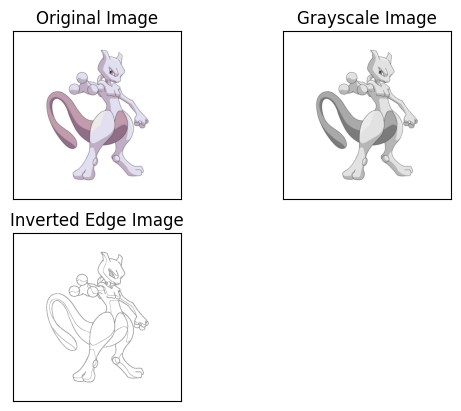

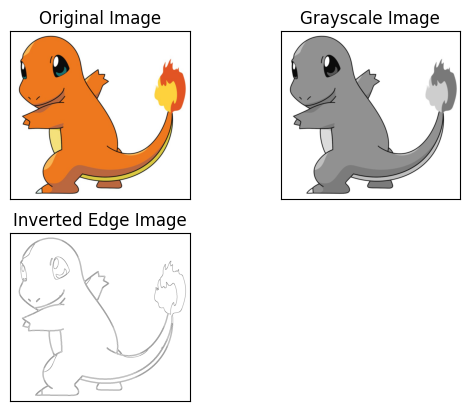

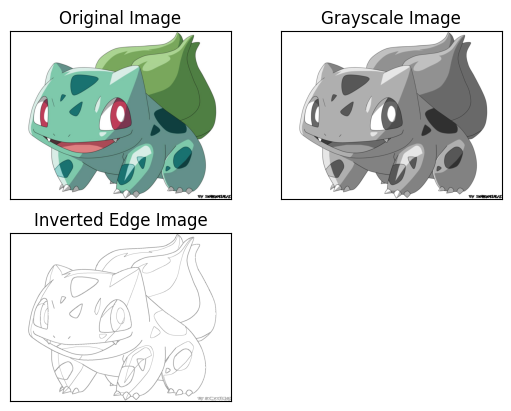

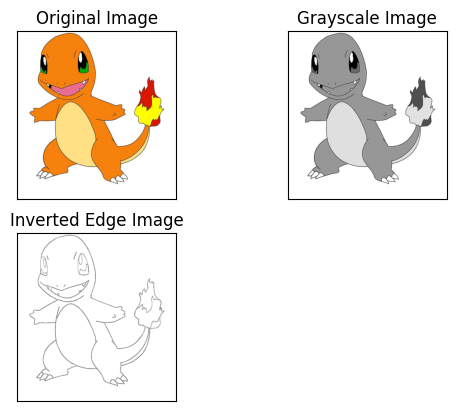

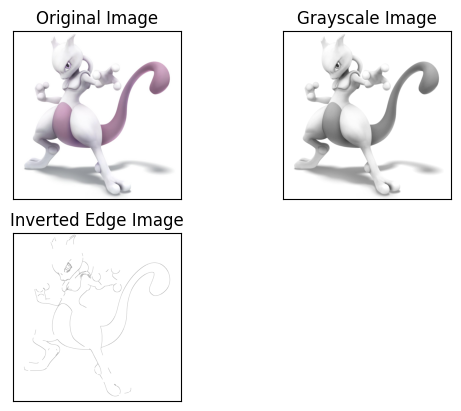

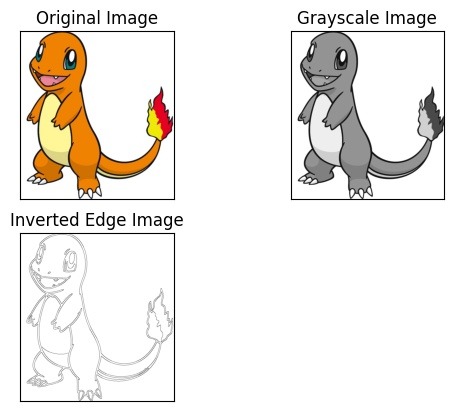

Lower Threshold: 120, Upper Threshold: 170


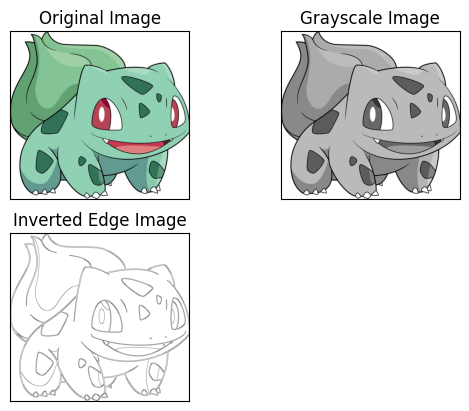

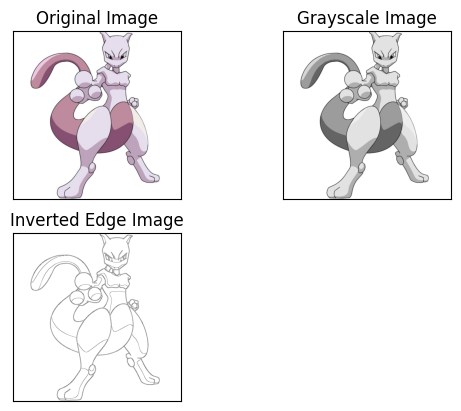

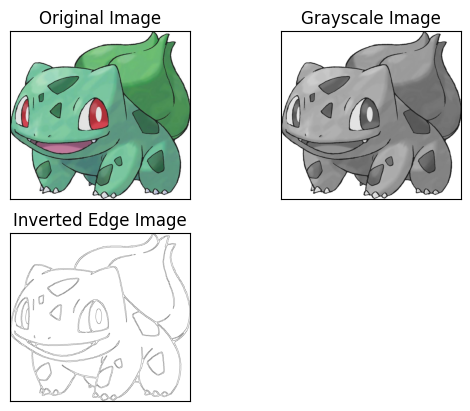

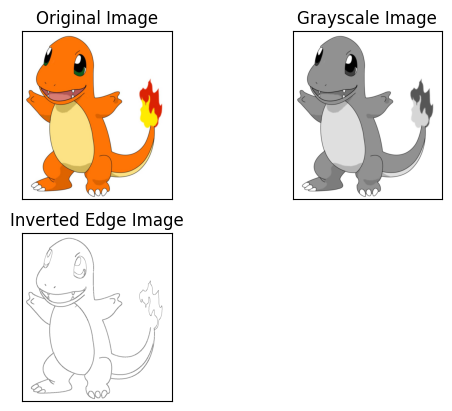

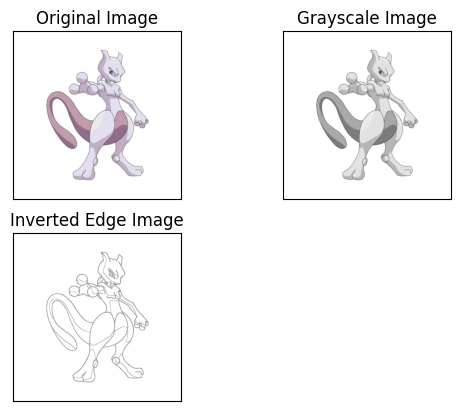

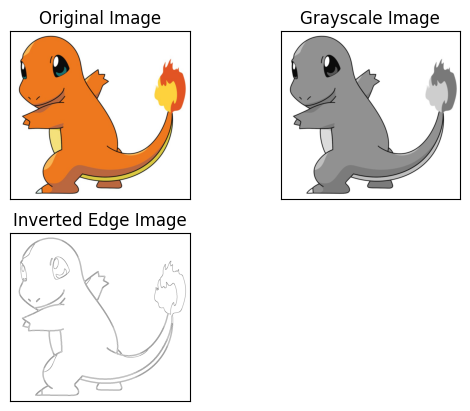

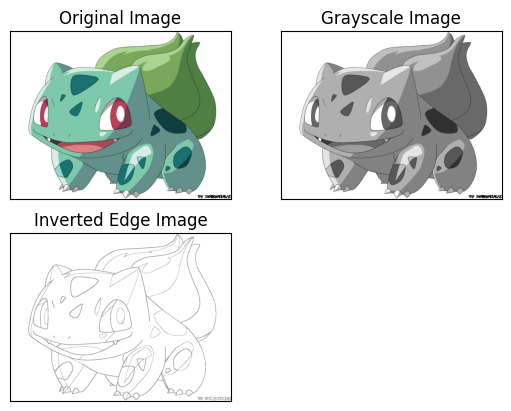

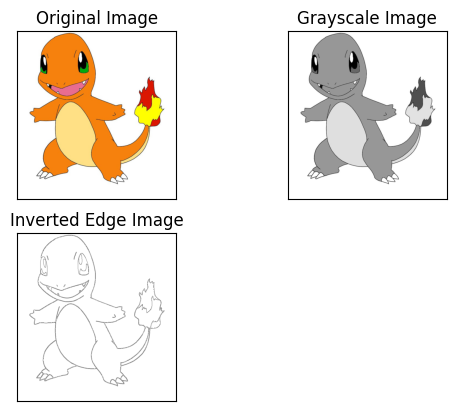

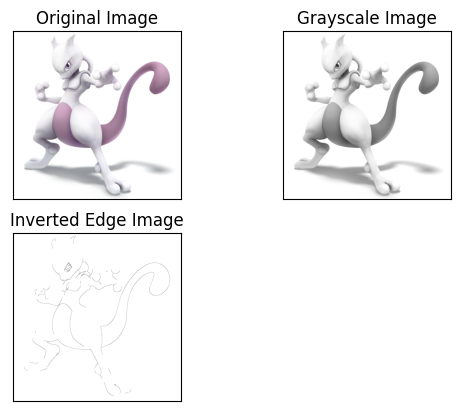

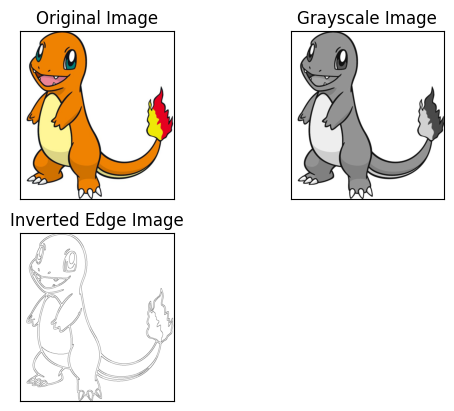

Lower Threshold: 140, Upper Threshold: 190


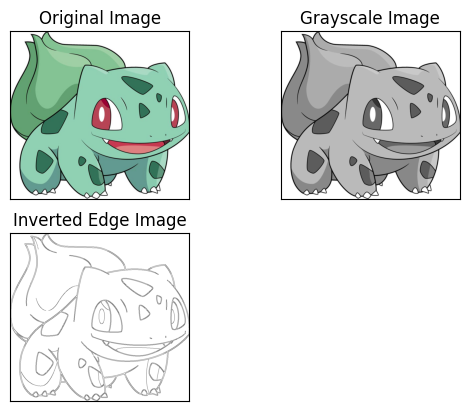

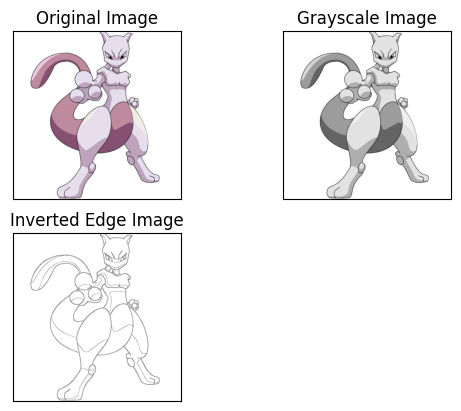

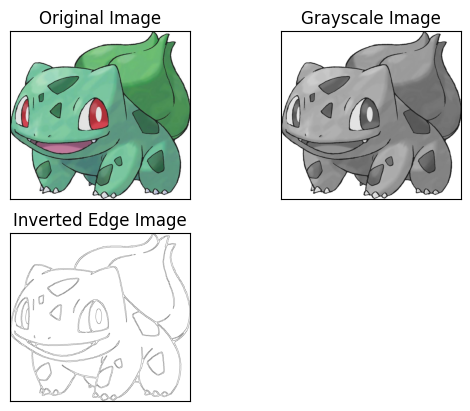

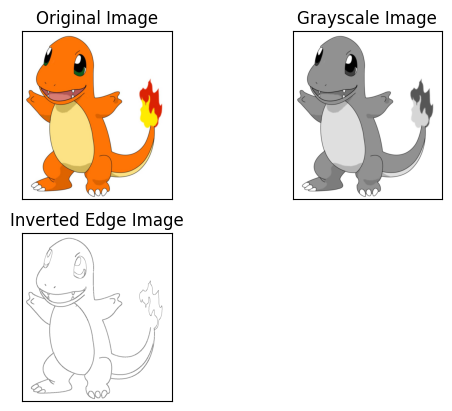

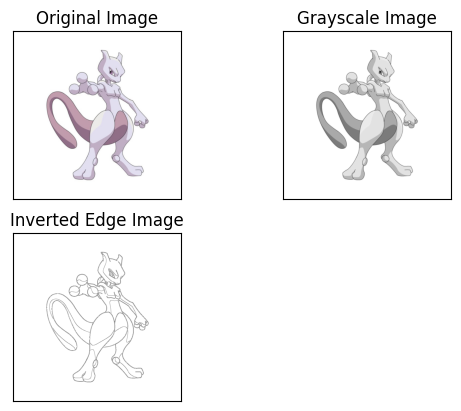

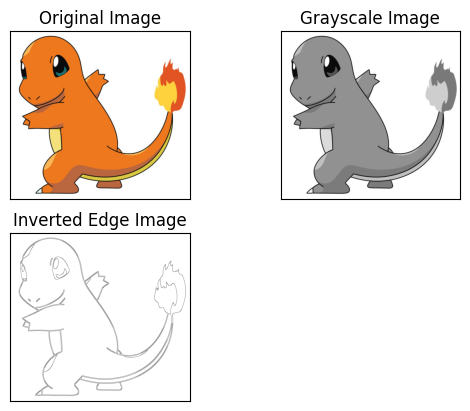

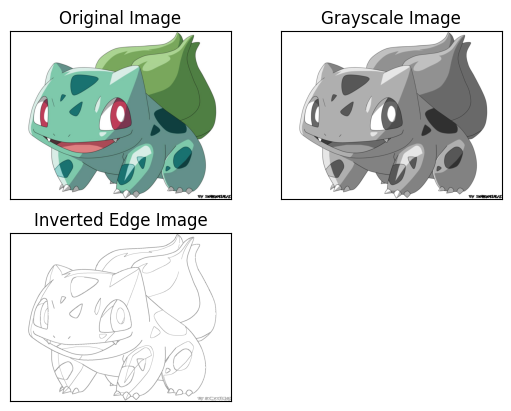

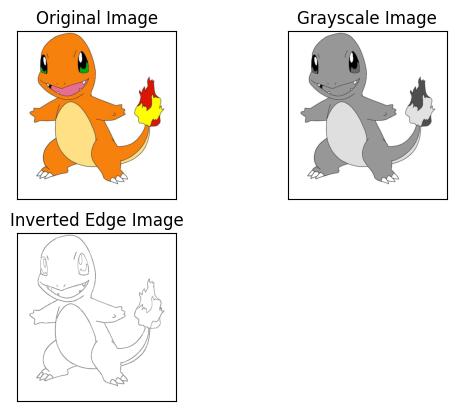

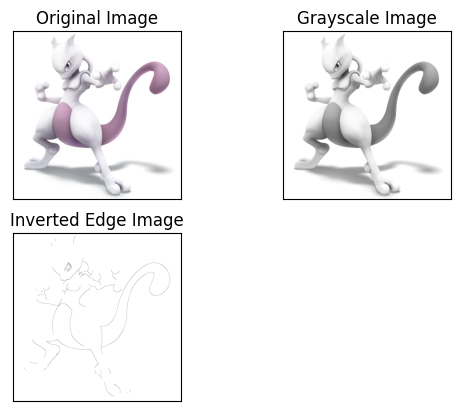

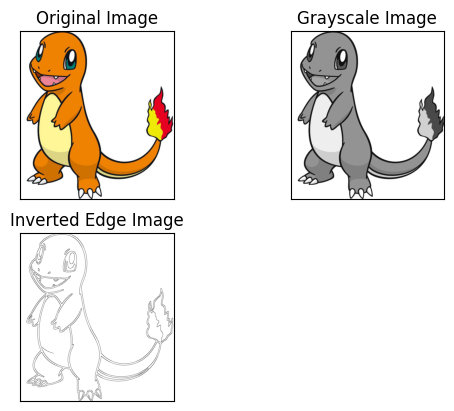

Lower Threshold: 160, Upper Threshold: 210


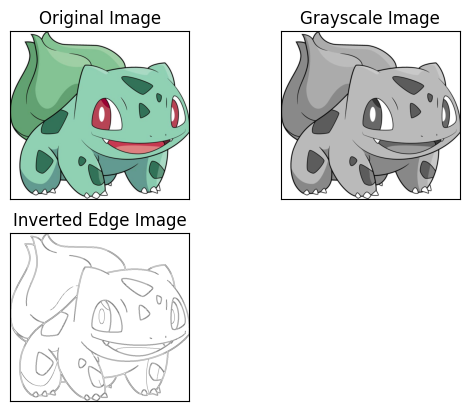

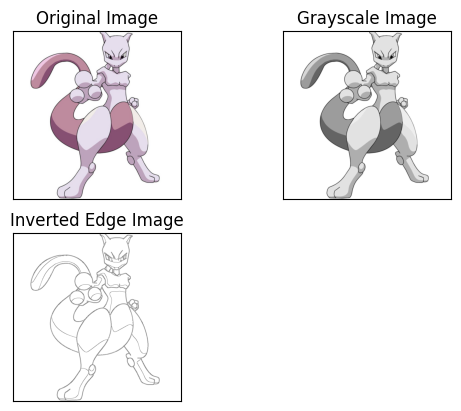

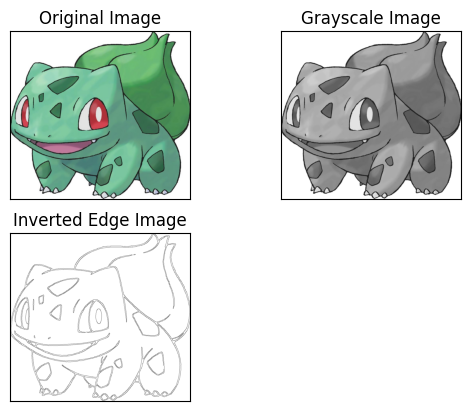

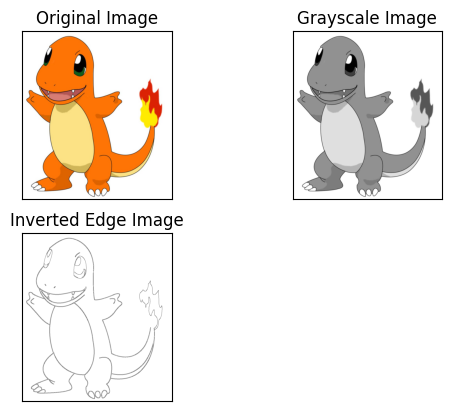

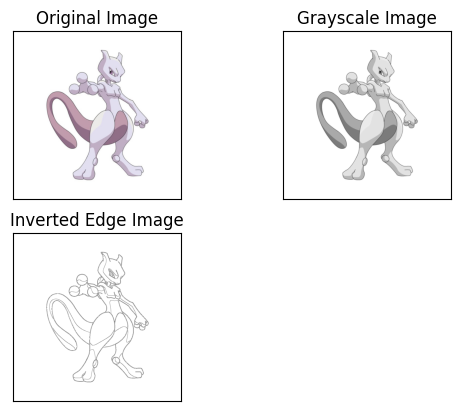

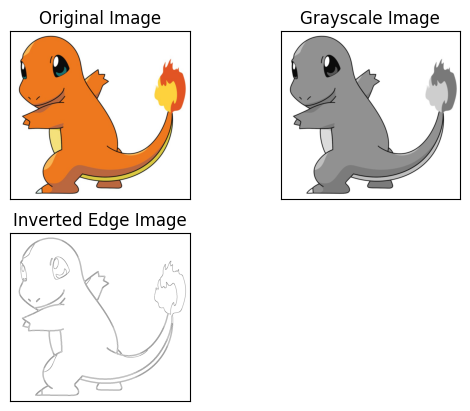

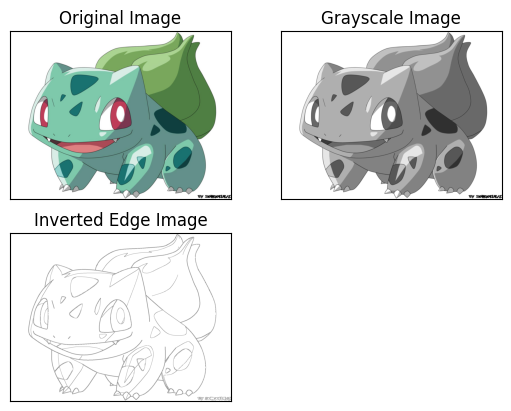

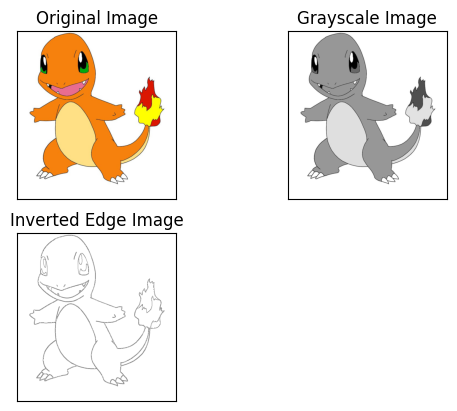

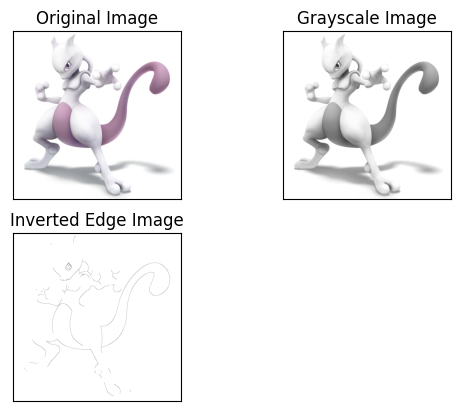

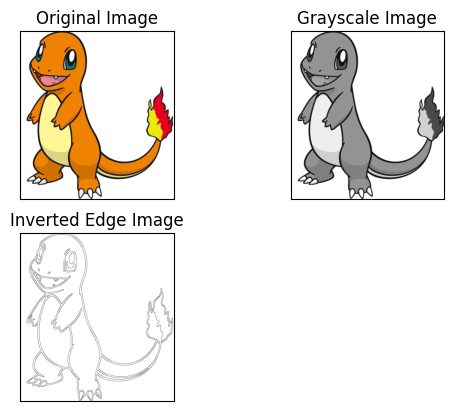

Lower Threshold: 180, Upper Threshold: 230


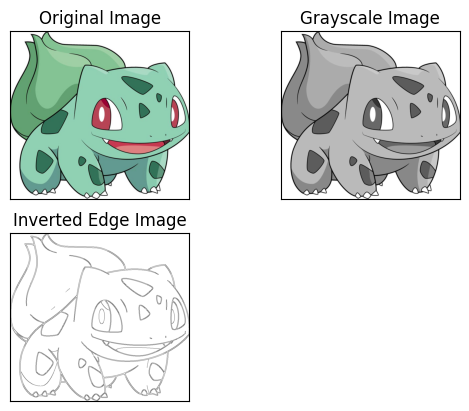

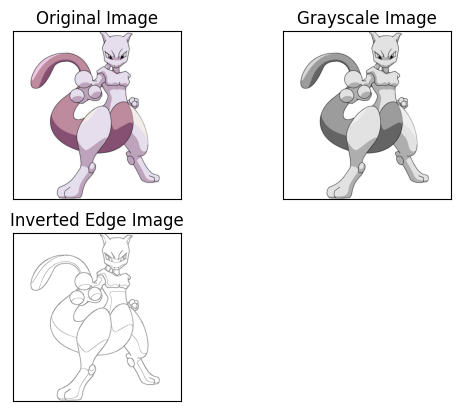

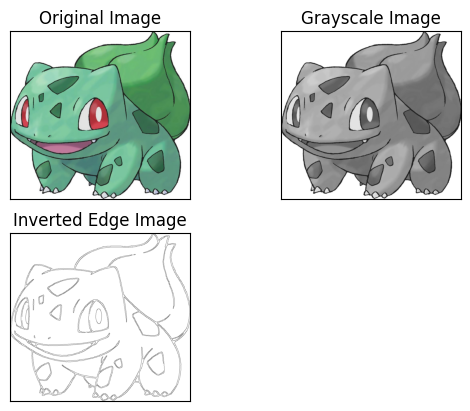

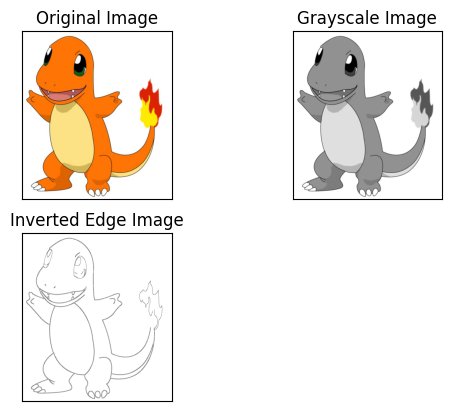

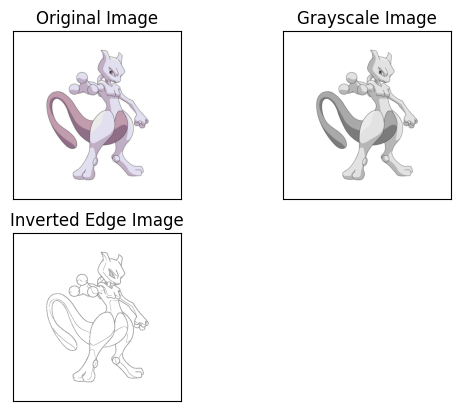

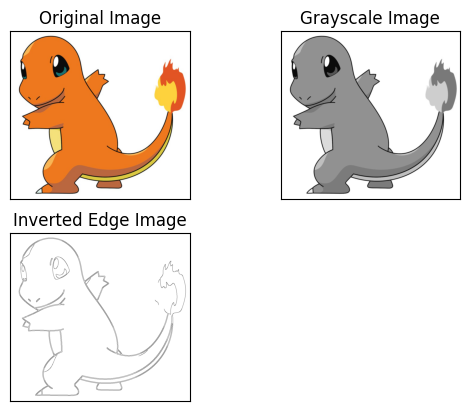

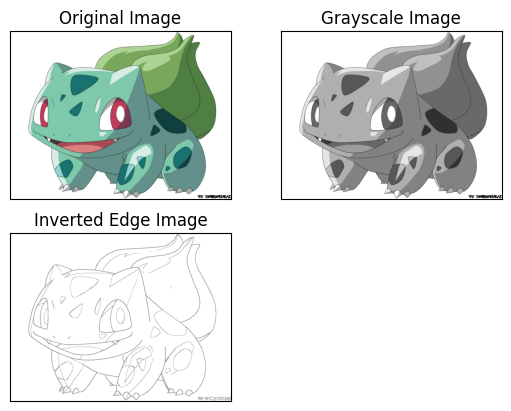

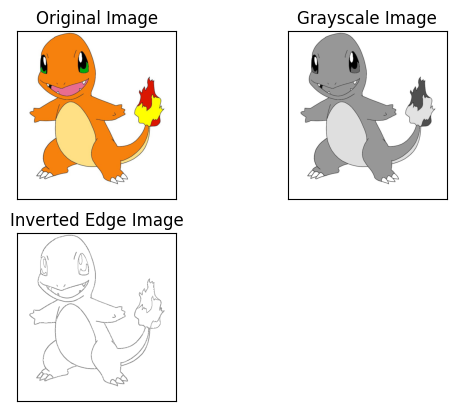

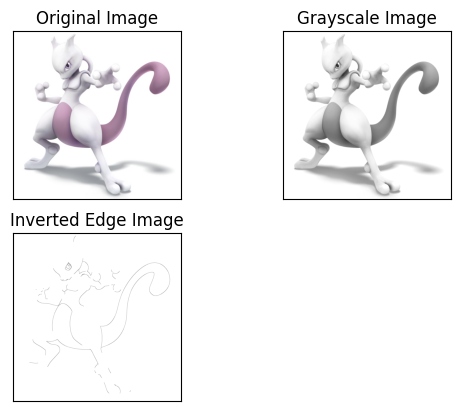

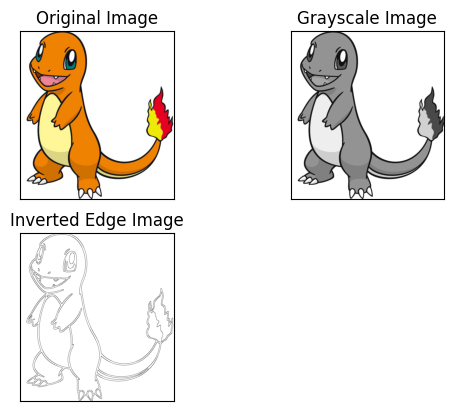

In [29]:
# logic
# 이미지 불러오기
images = load_images(dataset_folder)

# Gray scale로 변환
gray_images = convert_to_grayscale(images)

for lower_threshold in range(0, 181, 20):
    upper_threshold = lower_threshold + 50
    print(f"Lower Threshold: {lower_threshold}, Upper Threshold: {upper_threshold}")

    # Canny 알고리즘 적용
    edge_images = detect_edges(gray_images, lower_threshold, upper_threshold)

    # Colors invert
    inverted_edge_images = invert_colors(edge_images)

    # 결과 확인
    for i in range(len(inverted_edge_images)):
        plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title("Original Image"), plt.xticks([]), plt.yticks([])
        plt.subplot(2, 2, 2), plt.imshow(gray_images[i], cmap="gray")
        plt.title("Grayscale Image"), plt.xticks([]), plt.yticks([])
        plt.subplot(2, 2, 3), plt.imshow(inverted_edge_images[i], cmap="gray")
        plt.title("Inverted Edge Image"), plt.xticks([]), plt.yticks([])
        plt.show()

    # 이미지 저장
    save_images(inverted_edge_images, output_folder, prefix=f"inverted_edge_{lower_threshold}_{upper_threshold}")

